In [ ]:
#pip install -U qiskit qiskit-aer qiskit-visualization matplotlib


     ---------------------------------------- 7.8/7.8 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 9.6/9.6 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement qiskit-visualization (from versions: none)
ERROR: No matching distribution found for qiskit-visualization

[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import qiskit
import qiskit_aer
from qiskit.visualization import circuit_drawer, plot_histogram

print(qiskit.__version__)
print(qiskit_aer.__version__)


2.1.1
0.17.1


```Decomposed Toffoli vs Direct Toffoli Output Compare```

Input  →  Decomposed |  Direct 
----------------------------------------
|000> → 000  |  000  ✓
|001> → 100  |  100  ✓
|010> → 010  |  010  ✓
|011> → 110  |  110  ✓
|100> → 001  |  001  ✓
|101> → 101  |  101  ✓
|110> → 111  |  111  ✓
|111> → 011  |  011  ✓


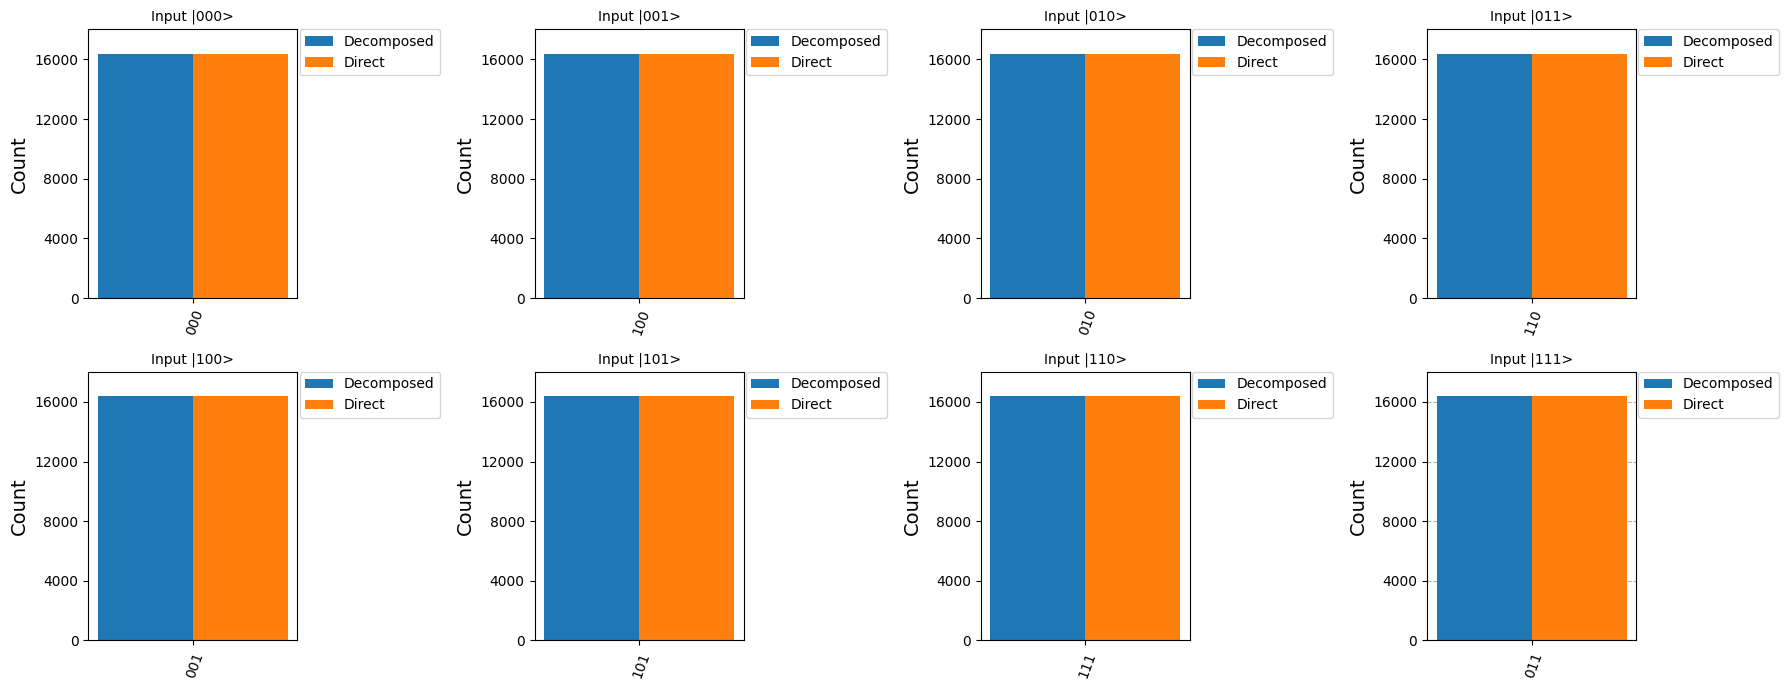

<Figure size 640x480 with 0 Axes>

In [35]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, circuit_drawer
import matplotlib.pyplot as plt

def toffoli_clifford_t(input_bits: str):
    """
    Builds and returns a 3-qubit Clifford+T decomposition of a Toffoli gate.
    Initializes qubits to |input_bits>.
    """
    qc = QuantumCircuit(3, name=f"Toffoli_{input_bits}")
    
    for j, bit in enumerate(input_bits):
        if bit == "1":
            qc.x(j)

    
    qc.h(2)
    qc.t(0)
    qc.cx(0, 1)
    qc.tdg(1)
    qc.cx(0, 1)
    qc.t(1)
    qc.cx(1, 2)
    qc.tdg(2)
    qc.cx(0, 2)
    qc.t(2)
    qc.cx(1, 2)
    qc.tdg(2)
    qc.cx(0, 2)
    qc.t(2)
    qc.h(2)

    qc.measure_all()
    return qc


def direct_toffoli(input_bits: str):
    """
    Initializes |input_bits>, applies CCX with controls q0,q1 and target q2, then measures.
    """
    qc = QuantumCircuit(3, name=f"CCX_{input_bits}")
    for j, bit in enumerate(input_bits):
        if bit == "1":
            qc.x(j)
    qc.ccx(0, 1, 2)
    qc.measure_all()
    return qc


backend = AerSimulator()
shots = 16384

print("Input  →  Decomposed |  Direct ")
print("-" * 40)

results = {}  

for i in range(8):
    bits = f"{i:03b}"

    qc1 = toffoli_clifford_t(bits)
    qc2 = direct_toffoli(bits)

    job1 = backend.run(qc1, shots=shots)
    job2 = backend.run(qc2, shots=shots)

    counts1 = job1.result().get_counts()
    counts2 = job2.result().get_counts()

    out1 = max(counts1, key=counts1.get)
    out2 = max(counts2, key=counts2.get)
    match = (out1 == out2)

    print(f"|{bits}> → {out1:<3}  |  {out2:<3}  {'✓' if match else '✗'}")

    results[bits] = (counts1, counts2, out1, out2, match)


fig, axs = plt.subplots(2, 4, figsize=(18, 7))
axs = axs.flatten()

for idx, bits in enumerate(sorted(results.keys())):
    counts1, counts2, out1, out2, match = results[bits]

    # draw both histograms on the given Axes
    plot_histogram([counts1, counts2],
                   ax=axs[idx],
                   legend=["Decomposed", "Direct"],
                   bar_labels=False)

    # per-subplot title (axis title, not figure suptitle)
    axs[idx].set_title(
        f"Input |{bits}>",
        fontsize=10
    )

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()
